In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1> 1. CARICAMENTO DEI DATI

In [3]:
#Carichiamo il file csv contenente i dati relativi al contagio da COVID-19 in Italia

In [4]:
#Ultimi dati disponibili: 18 Giugno 2021 

In [5]:
covid_df = pd.read_csv('dpc-covid19-ita-province.csv')

In [6]:
#Creiamo il dataframe covid_df, utilizzando solo le colonne che ci servono

In [7]:
covid_df = covid_df[['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi']]

In [8]:
#Rinominiamo le colonne regione e provincia per comodità

In [9]:
covid_df.rename(columns= {"denominazione_regione" : "regione", "denominazione_provincia" : "provincia"}, inplace=True)

In [10]:
#Settiamo la colonna 'Regione' come indice per poter creare un dataframe esclusivo per i dati pugliesi

In [11]:
covid_puglia = covid_df.set_index("regione")
covid_puglia = covid_puglia.loc['Puglia']

In [12]:
#Sistemiamo la colonna 'data'

In [13]:
covid_puglia['data'] = covid_puglia['data'].astype('datetime64[ns]')

In [14]:
#Calcoliamo il totale dei casi in Puglia, utilizzando gli ultimi dati disponibili*

In [15]:
totale_casi = covid_puglia.set_index('data').loc['2021-06-18 17:00:00', 'totale_casi'].sum()
print(f"Stando agli ultimi dati disponibili, il totale dei casi nella regione Puglia ammonta a {totale_casi} unità.")

Stando agli ultimi dati disponibili, il totale dei casi nella regione Puglia ammonta a 252757 unità.


<h1> PROVINCIA DI LECCE

In [16]:
#Dal dataframe pugliese, creiamo quello relativo alla provincia di Lecce

In [17]:
covid_LE = covid_puglia[['data', 'provincia', 'totale_casi']]
covid_LE = covid_LE.set_index('provincia').loc['Lecce']

In [18]:
#Calcoliamo l'incrementare dei nuovi casi giornalieri

In [19]:
covid_LE['nuovi_casi'] = covid_LE['totale_casi'].diff()

In [20]:
#Evidenziamo la situazione della provincia di Lecce, utilizzando gli ultimi dati disponibili*

In [21]:
print("La situazione, descritta dagli ultimi dati raccolti, della provincia di Lecce:")
print(f"{covid_LE.tail(1)}")

La situazione, descritta dagli ultimi dati raccolti, della provincia di Lecce:
                         data  totale_casi  nuovi_casi
provincia                                             
Lecce     2021-06-18 17:00:00        26852        12.0


In [22]:
#Disegniamo un grafico per rappresentare l'andamento dei contagi in provincia di Lecce

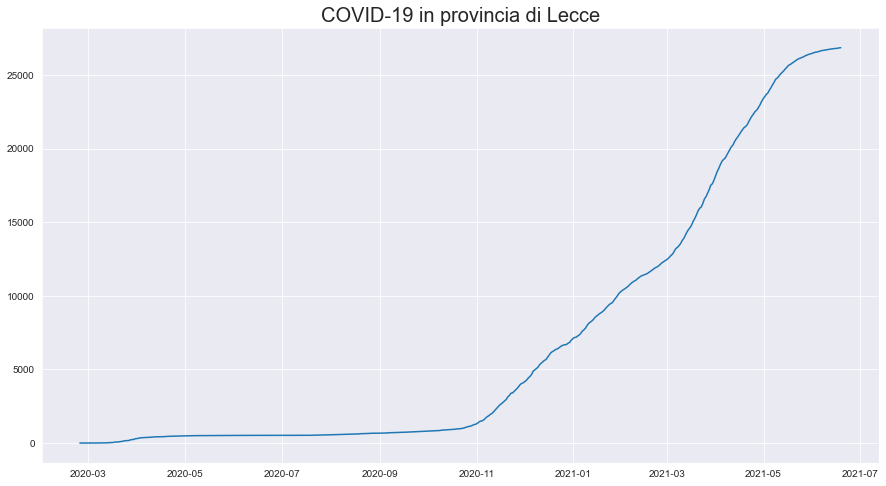

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.title("COVID-19 in provincia di Lecce", fontsize=20)
plt.plot(covid_LE.data, covid_LE.totale_casi);

In [24]:
#Calcoliamo la media mobile a 7 giorni, dei nuovi casi, in provincia di Lecce

In [25]:
covid_LE['SMA_7'] = covid_LE['nuovi_casi'].rolling(7).mean()

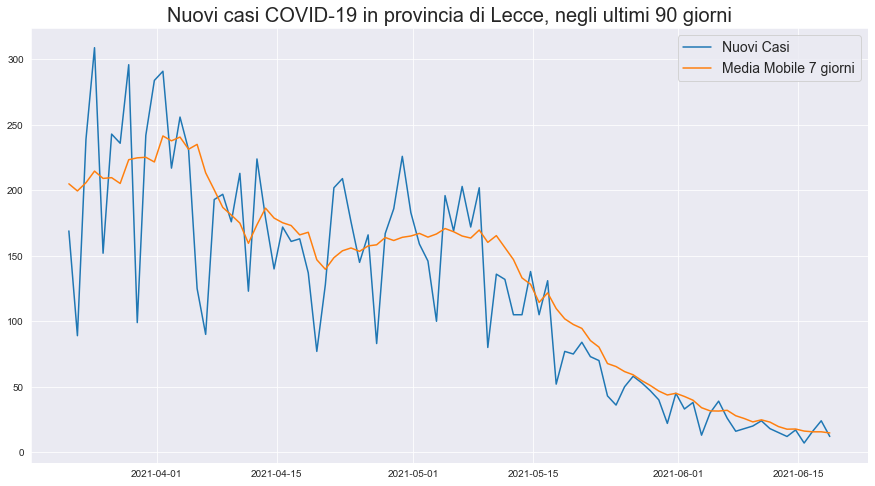

In [26]:
data_LE = covid_LE.data.tail(90)
casi_LE = covid_LE.nuovi_casi.tail(90)
sma_LE = covid_LE.SMA_7.tail(90)
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.title("Nuovi casi COVID-19 in provincia di Lecce, negli ultimi 90 giorni", fontsize=20)
plt.plot(data_LE, casi_LE, label ='Nuovi Casi')
plt.plot(data_LE, sma_LE, label ='Media Mobile 7 giorni')
plt.legend(fontsize=14);

<h1> PROVINCIA DI FOGGIA

In [27]:
#Dal df pugliese, creiamo quello relativo alla provincia di Foggia

In [28]:
covid_FG = covid_puglia[['data', 'provincia', 'totale_casi']]
covid_FG = covid_FG.set_index('provincia').loc['Foggia']
#covid_FG = covid_FG.set_index('data')

In [29]:
#Calcoliamo l'incremento dei casi nel foggiano

In [30]:
covid_FG['nuovi_casi'] = covid_FG['totale_casi'].diff()

In [31]:
#Evidenziamo la situazione della provincia di Foggia, utilizzando gli ultimi dati disponibili*

In [32]:
print("La situazione, descritta dagli ultimi dati raccolti, della provincia di Foggia:")
print(f"{covid_FG.tail(1)}")

La situazione, descritta dagli ultimi dati raccolti, della provincia di Foggia:
                         data  totale_casi  nuovi_casi
provincia                                             
Foggia    2021-06-18 17:00:00        45107        19.0


In [33]:
#Disegniamo un grafico per rappresentare l'andamento dei contagi in provincia di Foggia

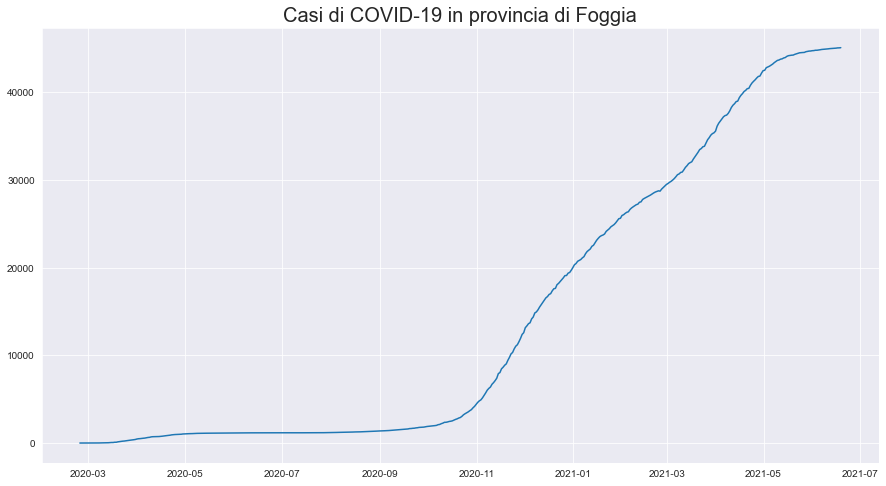

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Casi di COVID-19 in provincia di Foggia', fontsize=20)
plt.plot(covid_FG.data, covid_FG.totale_casi);

In [35]:
#Calcoliamo la media mobile a 7 giorni, dei nuovi casi, in provincia di Foggia

In [36]:
covid_FG['SMA_7'] = covid_FG['nuovi_casi'].rolling(7).mean()

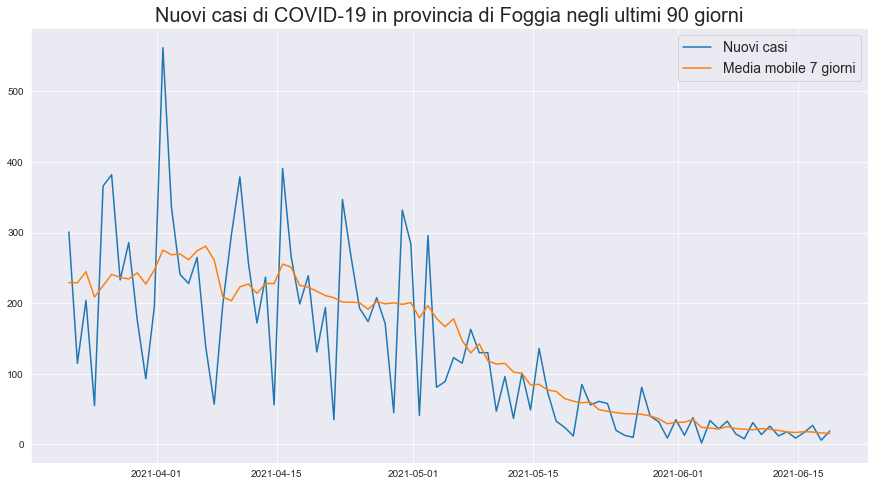

In [37]:
data_FG = covid_FG.data.tail(90)
casi_FG = covid_FG.nuovi_casi.tail(90)
sma_FG = covid_FG.SMA_7.tail(90)
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Nuovi casi di COVID-19 in provincia di Foggia negli ultimi 90 giorni', fontsize=20)
plt.plot(data_FG, casi_FG, label = 'Nuovi casi')
plt.plot(data_FG, sma_FG, label = 'Media mobile 7 giorni')
plt.legend(fontsize=14);

<h1> PROVINCIA DI BARLETTA, ANDRIA, TRANI

In [38]:
#Dal df pugliese, creiamo quello relativo alla provincia BAT

In [39]:
covid_BAT = covid_puglia[['data', 'provincia', 'totale_casi']]
covid_BAT = covid_BAT.set_index('provincia').loc['Barletta-Andria-Trani']
#covid_BAT = covid_BAT.set_index('data')

In [40]:
#Calcoliamo l'incremento nella provincia BAT

In [41]:
covid_BAT['nuovi_casi'] = covid_BAT['totale_casi'].diff()

In [42]:
#Evidenziamo la situazione della provincia BAT, utilizzando gli ultimi dati disponibili*

In [43]:
print("La situazione, descritta dagli ultimi dati raccolti, della provincia BAT:")
print(f"{covid_BAT.tail(1)}")

La situazione, descritta dagli ultimi dati raccolti, della provincia BAT:
                                     data  totale_casi  nuovi_casi
provincia                                                         
Barletta-Andria-Trani 2021-06-18 17:00:00        25554         7.0


In [44]:
#Disegniamo un grafico per rappresentare l'andamento dei contagi nella provincia BAT

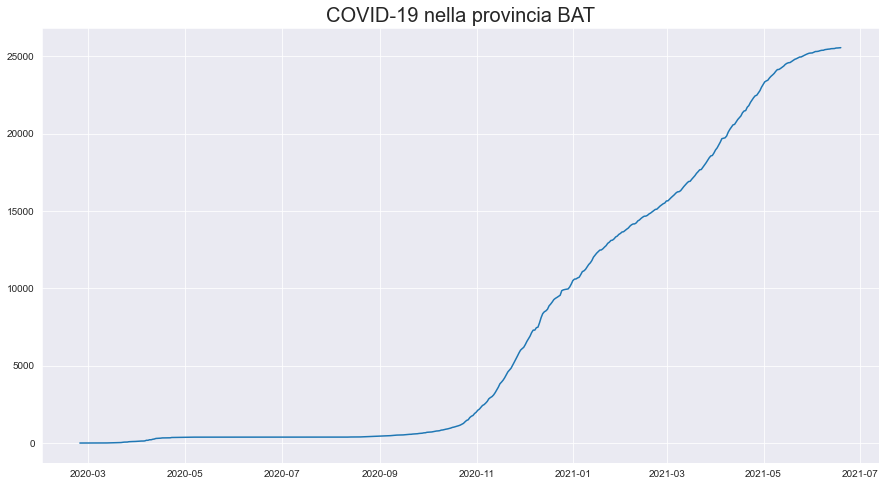

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('COVID-19 nella provincia BAT', fontsize=20)
plt.plot(covid_BAT.data, covid_BAT.totale_casi);

In [46]:
#Calcoliamo la media mobile a 7 giorni, dei nuovi casi, nella provincia BAT

In [47]:
covid_BAT['SMA_7'] = covid_BAT['nuovi_casi'].rolling(7).mean()

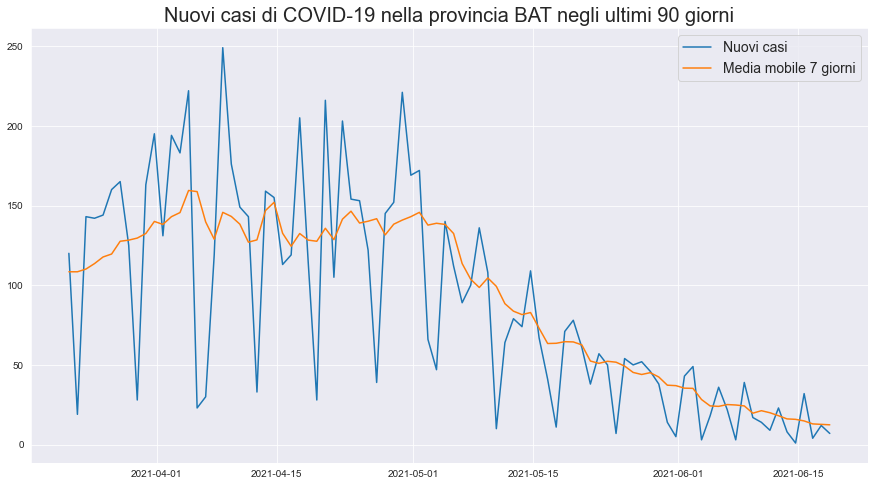

In [48]:
data_BAT = covid_BAT.data.tail(90)
casi_BAT = covid_BAT.nuovi_casi.tail(90)
sma_BAT = covid_BAT.SMA_7.tail(90)
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Nuovi casi di COVID-19 nella provincia BAT negli ultimi 90 giorni', fontsize=20)
plt.plot(data_BAT, casi_BAT, label = 'Nuovi casi')
plt.plot(data_BAT, sma_BAT, label = 'Media mobile 7 giorni')
plt.legend(fontsize=14);

<h1> PROVINCIA DI BARI

In [49]:
#Dal df pugliese, creiamo quello relativo alla provincia di Bari

In [50]:
covid_BA = covid_puglia[['data', 'provincia', 'totale_casi']]
covid_BA = covid_BA.set_index('provincia').loc['Bari']
#covid_BA = covid_BA.set_index('data')

In [51]:
#Calcoliamo l'incremento dei casi nella provincia di Bari

In [52]:
covid_BA['nuovi_casi'] = covid_BA['totale_casi'].diff()

In [53]:
#Evidenziamo la situazione della provincia di Bari, utilizzando gli ultimi dati disponibili*

In [54]:
print("La situazione, descritta dagli ultimi dati raccolti, della provincia di Bari:")
print(f"{covid_BA.tail(1)}")

La situazione, descritta dagli ultimi dati raccolti, della provincia di Bari:
                         data  totale_casi  nuovi_casi
provincia                                             
Bari      2021-06-18 17:00:00        95056        23.0


In [55]:
#Disegniamo un grafico per rappresentare l'andamento dei contagi nella provincia di Bari

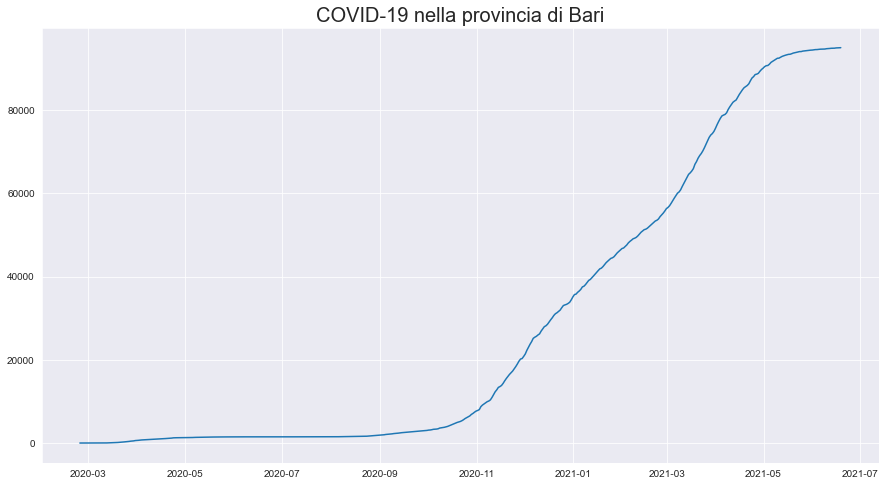

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('COVID-19 nella provincia di Bari', fontsize=20)
plt.plot(covid_BA.data, covid_BA.totale_casi);

In [57]:
#Calcoliamo la media mobile 7 giorni, dei nuovi casi, in provincia di Bari

In [58]:
covid_BA['SMA_7'] = covid_BA['nuovi_casi'].rolling(7).mean()

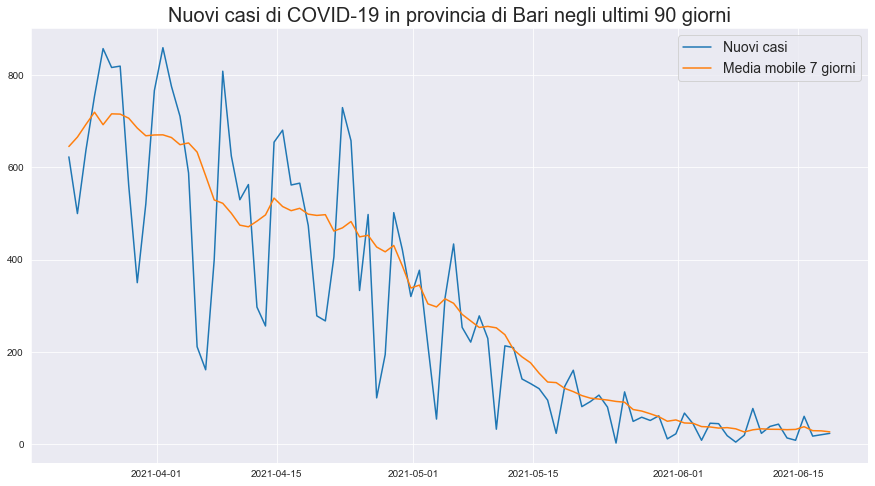

In [59]:
data_BA = covid_BA.data.tail(90)
casi_BA = covid_BA.nuovi_casi.tail(90)
sma_BA = covid_BA.SMA_7.tail(90)
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Nuovi casi di COVID-19 in provincia di Bari negli ultimi 90 giorni', fontsize=20)
plt.plot(data_BA, casi_BA, label = 'Nuovi casi')
plt.plot(data_BA, sma_BA, label = 'Media mobile 7 giorni')
plt.legend(fontsize=14);

<h1> PROVINCIA DI BRINDISI

In [60]:
#Dal df pugliese, creiamo quello relativo alla provincia di Brindisi

In [61]:
covid_BR = covid_puglia[['data', 'provincia', 'totale_casi']]
covid_BR = covid_BR.set_index('provincia').loc['Brindisi']
#covid_BR = covid_BR.set_index('data')

In [62]:
#Calcoliamo l'incremento dei casi nel brindisino

In [63]:
covid_BR['nuovi_casi'] = covid_BR['totale_casi'].diff()

In [64]:
#Evidenziamo la situazione della provincia di Brindisi, utilizzando gli ultimi dati disponibili*

In [65]:
print("La situazione, descritta dagli ultimi dati raccolti, della provincia di Brindisi:")
print(f"{covid_BR.tail(1)}")

La situazione, descritta dagli ultimi dati raccolti, della provincia di Brindisi:
                         data  totale_casi  nuovi_casi
provincia                                             
Brindisi  2021-06-18 17:00:00        19687        25.0


In [66]:
#Disegniamo un grafico per rappresentare l'andamento dei contagi nella provincia di Brindisi

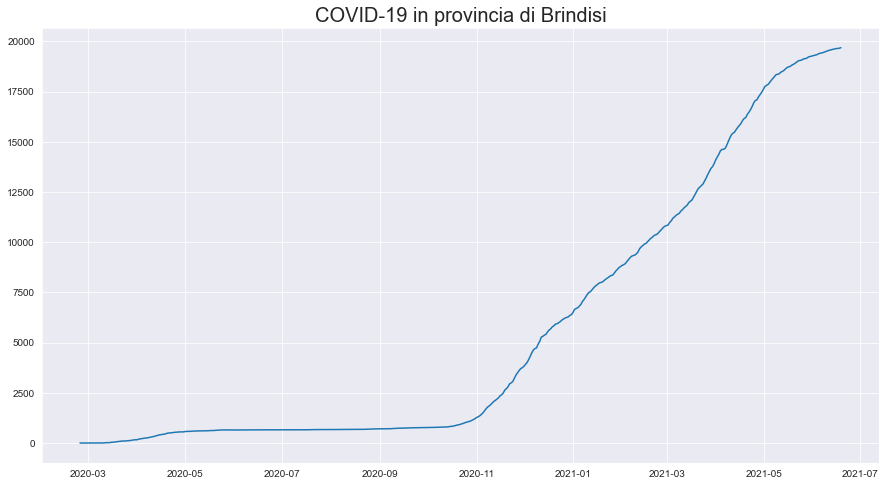

In [67]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('COVID-19 in provincia di Brindisi', fontsize=20)
plt.plot(covid_BR.data, covid_BR.totale_casi);

In [68]:
#Calcoliamo la media mobile a 7 giorni, dei nuovi casi, in provincia di Brindisi

In [69]:
covid_BR['SMA_7'] = covid_BR['nuovi_casi'].rolling(7).mean()

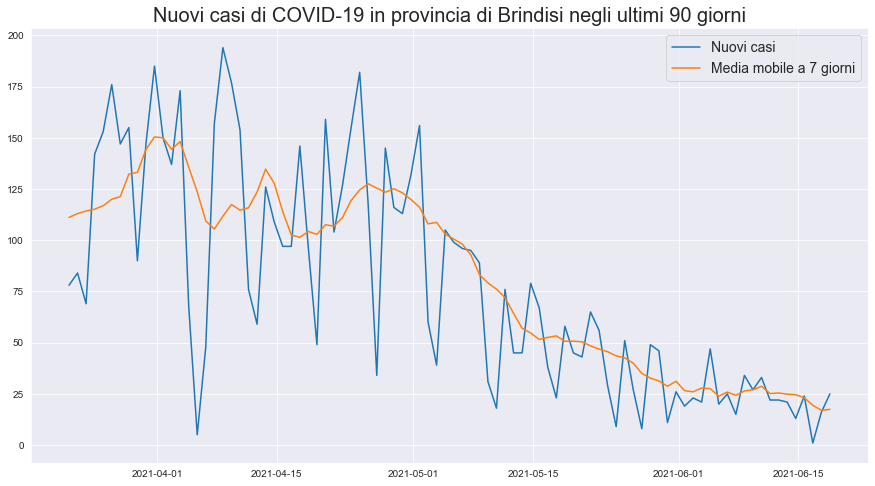

In [70]:
data_BR = covid_BR.data.tail(90)
casi_BR = covid_BR.nuovi_casi.tail(90)
sma_BR = covid_BR.SMA_7.tail(90)
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Nuovi casi di COVID-19 in provincia di Brindisi negli ultimi 90 giorni', fontsize=20)
plt.plot(data_BR, casi_BR, label = 'Nuovi casi')
plt.plot(data_BR, sma_BR, label = 'Media mobile a 7 giorni')
plt.legend(fontsize=14);

<h1> PROVINCIA DI TARANTO

In [71]:
#Dal df pugliese, creiamo quello relativo alla provincia di Taranto

In [72]:
covid_TA = covid_puglia[['data', 'provincia', 'totale_casi']]
covid_TA = covid_TA.set_index('provincia').loc['Taranto']
#covid_TA = covid_TA.set_index('data')

In [73]:
#Calcoliamo l'incremento dei casi nella provincia di Taranto

In [74]:
covid_TA['nuovi_casi'] = covid_TA['totale_casi'].diff()

In [75]:
#Evidenziamo la situazione della provincia di Taranto, utilizzando gli ultimi dati disponibili*

In [76]:
print("La situazione, descritta dagli ultimi dati raccolti, della provincia di Taranto:")
print(f"{covid_TA.tail(1)}")

La situazione, descritta dagli ultimi dati raccolti, della provincia di Taranto:
                         data  totale_casi  nuovi_casi
provincia                                             
Taranto   2021-06-18 17:00:00        39324        20.0


In [77]:
#Disegniamo un grafico per rappresentare l'andamento dei contagi nella provincia di Taranto

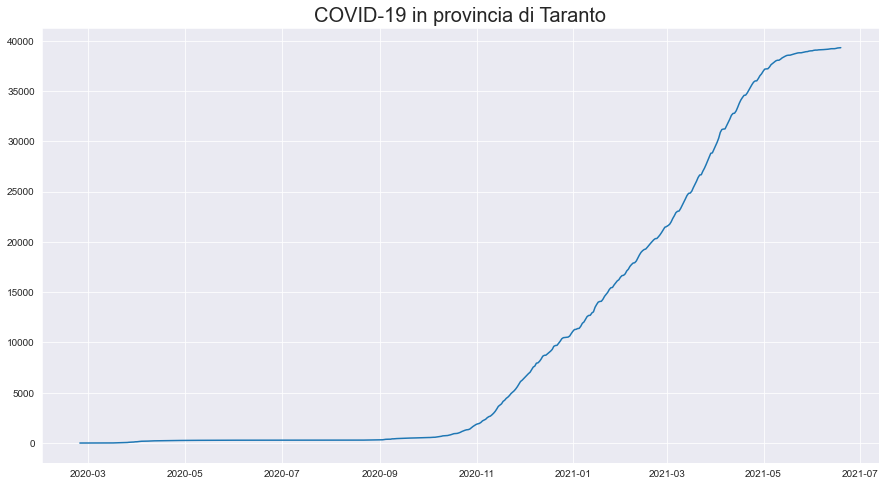

In [78]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('COVID-19 in provincia di Taranto', fontsize=20)
plt.plot(covid_TA.data, covid_TA.totale_casi);

In [79]:
#Calcoliamo la media mobile a 7 giorni, dei nuovi casi, in provincia di Taranto

In [80]:
covid_TA['SMA_7'] = covid_TA['nuovi_casi'].rolling(7).mean()

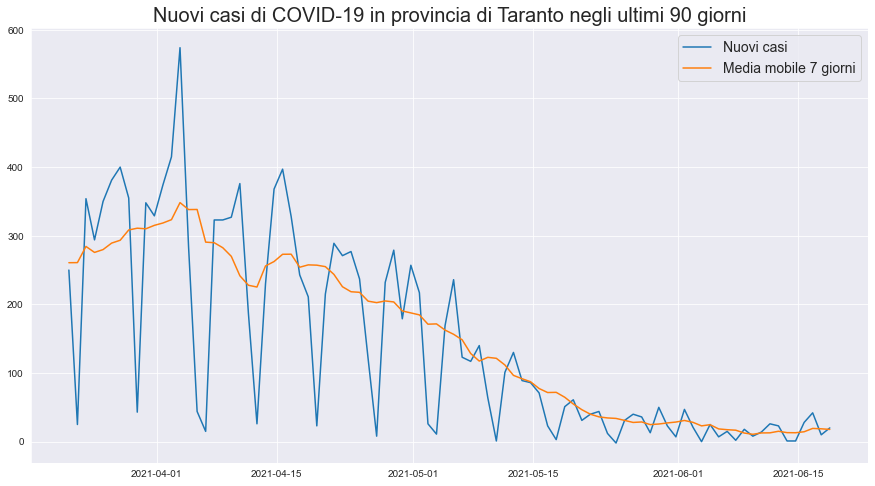

In [81]:
data_TA = covid_TA.data.tail(90)
casi_TA = covid_TA.nuovi_casi.tail(90)
sma_TA = covid_TA.SMA_7.tail(90)
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Nuovi casi di COVID-19 in provincia di Taranto negli ultimi 90 giorni', fontsize=20)
plt.plot(data_TA, casi_TA, label = 'Nuovi casi')
plt.plot(data_TA, sma_TA, label = 'Media mobile 7 giorni')
plt.legend(fontsize=14);

In [82]:
#Disegniamo un grafico in cui confrontare il numero dei casi tra le varie province della regione

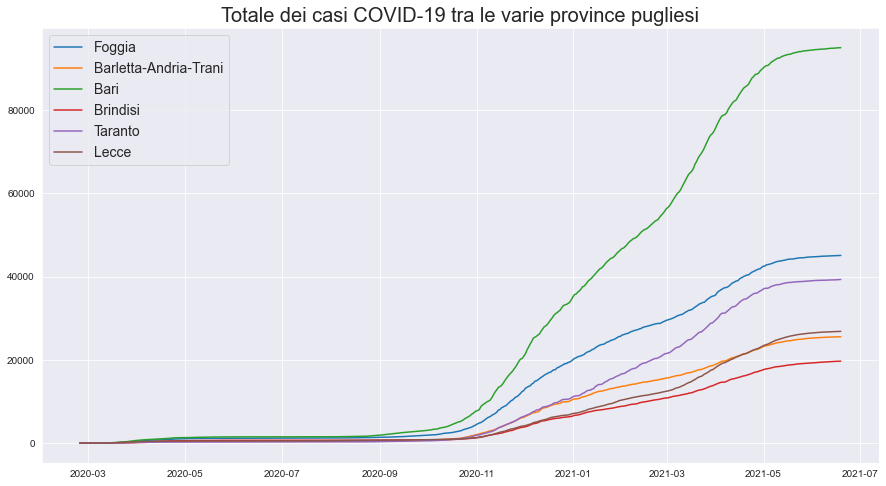

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Totale dei casi COVID-19 tra le varie province pugliesi', fontsize=20)
plt.plot(covid_FG.data, covid_FG.totale_casi, label='Foggia');
plt.plot(covid_BAT.data, covid_BAT.totale_casi, label='Barletta-Andria-Trani');
plt.plot(covid_BA.data, covid_BA.totale_casi, label='Bari');
plt.plot(covid_BR.data, covid_BR.totale_casi, label='Brindisi');
plt.plot(covid_TA.data, covid_TA.totale_casi, label='Taranto');
plt.plot(covid_LE.data, covid_LE.totale_casi, label='Lecce');
plt.legend(fontsize=14);

In [84]:
#Casi in provincia di Lecce e Bari per 100mila abitanti

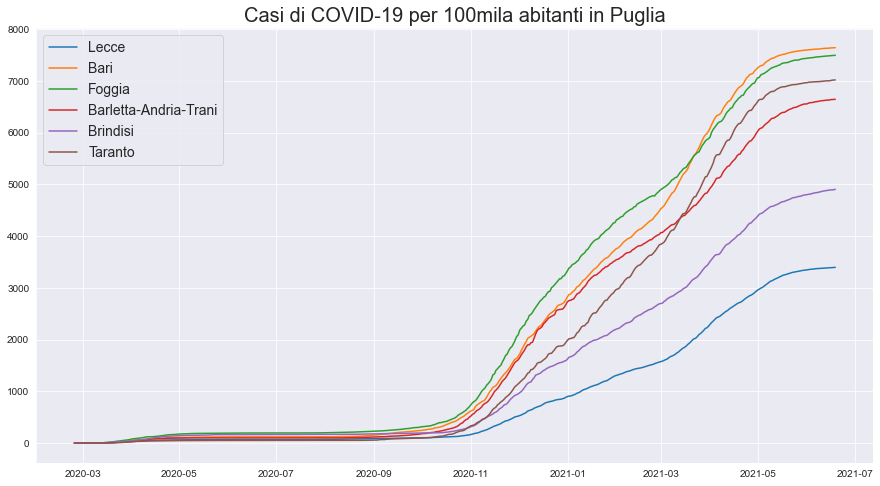

In [85]:
pop_LE = 791122
casi_100k_LE = covid_LE.totale_casi * 1e5 / pop_LE
pop_BA = 1244391
casi_100k_BA = covid_BA.totale_casi * 1e5 / pop_BA
pop_FG = 602081
pop_BAT = 384801
pop_BR = 401652
pop_TA = 560471
casi_100k_FG = covid_FG.totale_casi * 1e5 / pop_FG
casi_100k_BAT = covid_BAT.totale_casi * 1e5 / pop_BAT
casi_100k_BR = covid_BR.totale_casi * 1e5 / pop_BR
casi_100k_TA = covid_TA.totale_casi * 1e5 / pop_TA
plt.figure(figsize=(15,8))
plt.title('Casi di COVID-19 per 100mila abitanti in Puglia', fontsize=20)
plt.plot(covid_LE.data, casi_100k_LE, label='Lecce');
plt.plot(covid_BA.data, casi_100k_BA, label='Bari');
plt.plot(covid_FG.data, casi_100k_FG, label='Foggia');
plt.plot(covid_BAT.data, casi_100k_BAT, label='Barletta-Andria-Trani');
plt.plot(covid_BR.data, casi_100k_BR, label='Brindisi');
plt.plot(covid_TA.data, casi_100k_TA, label='Taranto');
plt.legend(fontsize=14);

In [86]:
#Andamento nuovi casi per 1000 abitanti

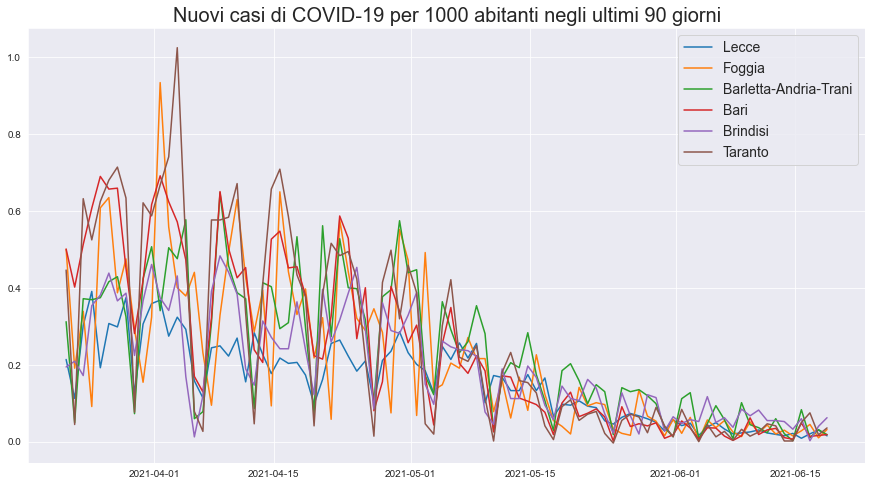

In [87]:
nuovi_casi_1k_LE = casi_LE * 1e3 / pop_LE
nuovi_casi_1k_FG = casi_FG * 1e3 / pop_FG
nuovi_casi_1k_BAT = casi_BAT * 1e3 / pop_BAT
nuovi_casi_1k_BA = casi_BA * 1e3 / pop_BA
nuovi_casi_1k_BR = casi_BR * 1e3 / pop_BR
nuovi_casi_1k_TA = casi_TA * 1e3 / pop_TA
plt.figure(figsize=(15,8))
plt.title('Nuovi casi di COVID-19 per 1000 abitanti negli ultimi 90 giorni', fontsize=20)
plt.plot(data_LE, nuovi_casi_1k_LE, label='Lecce');
plt.plot(data_FG, nuovi_casi_1k_FG, label='Foggia');
plt.plot(data_BAT, nuovi_casi_1k_BAT, label='Barletta-Andria-Trani');
plt.plot(data_BA, nuovi_casi_1k_BA, label='Bari');
plt.plot(data_BR, nuovi_casi_1k_BR, label='Brindisi');
plt.plot(data_TA, nuovi_casi_1k_TA, label='Taranto');
plt.legend(fontsize=14);